# Project for Module 4: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [29]:
def f(x):
    return x ** 2 + x + 1

In [30]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)
print(x_1)

[-3.         -2.98797595 -2.9759519  -2.96392786 -2.95190381 -2.93987976
 -2.92785571 -2.91583166 -2.90380762 -2.89178357 -2.87975952 -2.86773547
 -2.85571142 -2.84368737 -2.83166333 -2.81963928 -2.80761523 -2.79559118
 -2.78356713 -2.77154309 -2.75951904 -2.74749499 -2.73547094 -2.72344689
 -2.71142285 -2.6993988  -2.68737475 -2.6753507  -2.66332665 -2.65130261
 -2.63927856 -2.62725451 -2.61523046 -2.60320641 -2.59118236 -2.57915832
 -2.56713427 -2.55511022 -2.54308617 -2.53106212 -2.51903808 -2.50701403
 -2.49498998 -2.48296593 -2.47094188 -2.45891784 -2.44689379 -2.43486974
 -2.42284569 -2.41082164 -2.3987976  -2.38677355 -2.3747495  -2.36272545
 -2.3507014  -2.33867735 -2.32665331 -2.31462926 -2.30260521 -2.29058116
 -2.27855711 -2.26653307 -2.25450902 -2.24248497 -2.23046092 -2.21843687
 -2.20641283 -2.19438878 -2.18236473 -2.17034068 -2.15831663 -2.14629259
 -2.13426854 -2.12224449 -2.11022044 -2.09819639 -2.08617234 -2.0741483
 -2.06212425 -2.0501002  -2.03807615 -2.0260521  -2.

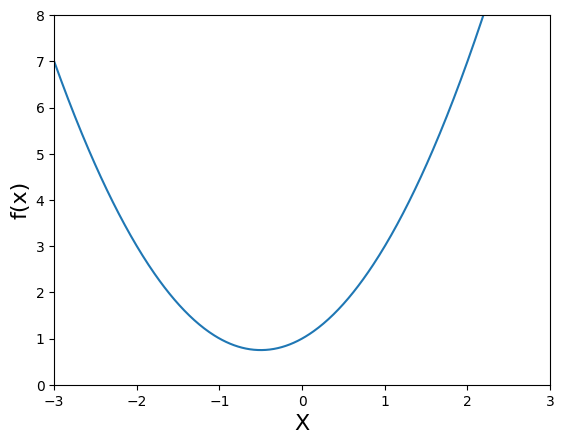

In [31]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [32]:
def df(x):
    return 2 * x + 1

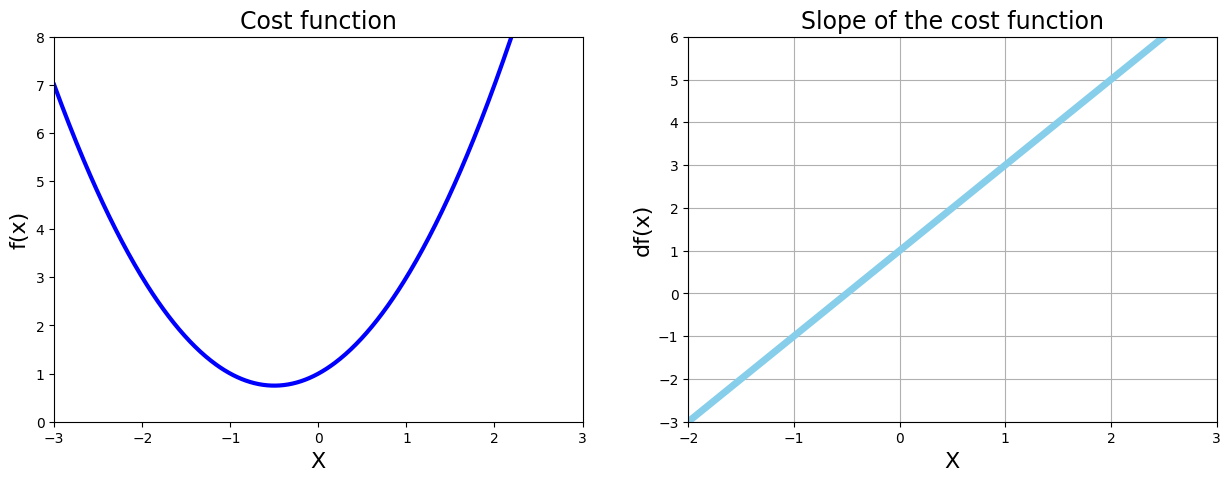

In [33]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [34]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
print(x_list)
slope_list = [df(new_x)]
print(slope_list)

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED] Calculate the derivative/gradient at previous_x
    
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update new_x using gradient descent formula

    step_size = abs(new_x - previous_x)
    # step_size = abs(new_x - previous_x): Computes the size of the step taken in this iteration.
    print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED] Append the derivative/gradient at new_x to slope_list

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))
print(x_list)


[3]
[7]
0.7000000000000002
0.56
0.44799999999999995
0.35840000000000005
0.28672
0.22937600000000002
0.18350079999999996
0.14680063999999998
0.11744051199999997
0.09395240959999998
0.07516192767999996
0.06012954214399996
0.04810363371519999
0.03848290697216
0.03078632557772798
0.024629060462182384
0.019703248369745907
0.015762598695796715
0.012610078956637405
0.010088063165309913
0.00807045053224792
0.006456360425798335
0.005165088340638668
0.0041320706725109235
0.003305656538008739
0.0026445252304070355
0.002115620184325595
0.001692496147460476
0.001353996917968392
0.0010831975343746914
0.0008665580274997975
0.0006932464219998047
0.000554597137599866
0.00044367771007985946
0.00035494216806392087
0.0002839537344511145
0.0002271629875609249
0.00018173039004870661
0.0001453843120389764
0.00011630744963120332
9.304595970494045e-05
7.443676776397457e-05
5.954941421115745e-05
4.763953136893706e-05
3.811162509514965e-05
3.0489300076097514e-05
2.4391440060889114e-05
1.9513152048733495e-05
1.56

[ 3.          2.3         1.74        1.292       0.9336      0.64688
  0.417504    0.2340032   0.08720256 -0.03023795 -0.12419036 -0.19935229
 -0.25948183 -0.30758547 -0.34606837 -0.3768547  -0.40148376 -0.42118701
 -0.43694961 -0.44955968 -0.45964775 -0.4677182  -0.47417456 -0.47933965
 -0.48347172 -0.48677737 -0.4894219  -0.49153752 -0.49323002 -0.49458401
 -0.49566721 -0.49653377 -0.49722701 -0.49778161 -0.49822529 -0.49858023
 -0.49886419 -0.49909135 -0.49927308 -0.49941846 -0.49953477 -0.49962782
 -0.49970225 -0.4997618  -0.49980944 -0.49984755 -0.49987804 -0.49990243
 -0.49992195 -0.49993756 -0.49995005 -0.49996004]


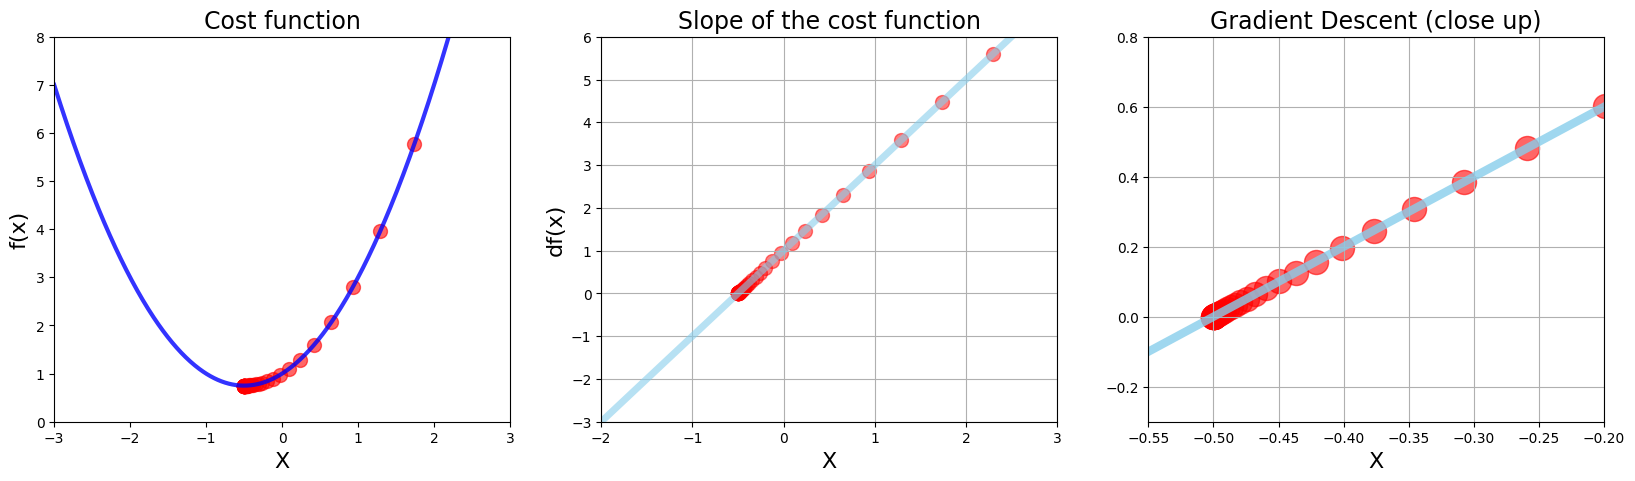

In [35]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
print(values)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [49]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return  x**4 - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*(x)

In [50]:
print(g(1))

2


In [58]:
# Make Data
print(x_2)

[-2.         -1.995996   -1.99199199 -1.98798799 -1.98398398 -1.97997998
 -1.97597598 -1.97197197 -1.96796797 -1.96396396 -1.95995996 -1.95595596
 -1.95195195 -1.94794795 -1.94394394 -1.93993994 -1.93593594 -1.93193193
 -1.92792793 -1.92392392 -1.91991992 -1.91591592 -1.91191191 -1.90790791
 -1.9039039  -1.8998999  -1.8958959  -1.89189189 -1.88788789 -1.88388388
 -1.87987988 -1.87587588 -1.87187187 -1.86786787 -1.86386386 -1.85985986
 -1.85585586 -1.85185185 -1.84784785 -1.84384384 -1.83983984 -1.83583584
 -1.83183183 -1.82782783 -1.82382382 -1.81981982 -1.81581582 -1.81181181
 -1.80780781 -1.8038038  -1.7997998  -1.7957958  -1.79179179 -1.78778779
 -1.78378378 -1.77977978 -1.77577578 -1.77177177 -1.76776777 -1.76376376
 -1.75975976 -1.75575576 -1.75175175 -1.74774775 -1.74374374 -1.73973974
 -1.73573574 -1.73173173 -1.72772773 -1.72372372 -1.71971972 -1.71571572
 -1.71171171 -1.70770771 -1.7037037  -1.6996997  -1.6956957  -1.69169169
 -1.68768769 -1.68368368 -1.67967968 -1.67567568 -1

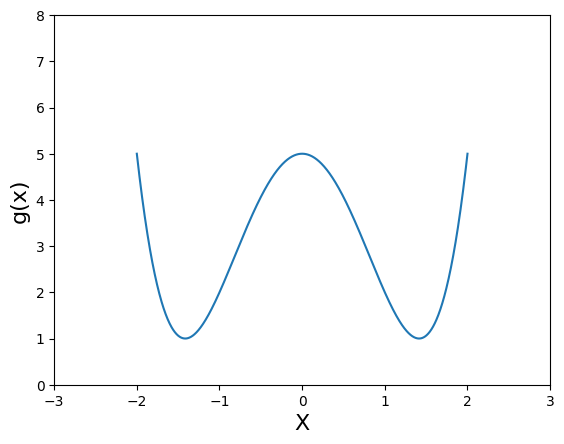

In [59]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2))
plt.show()

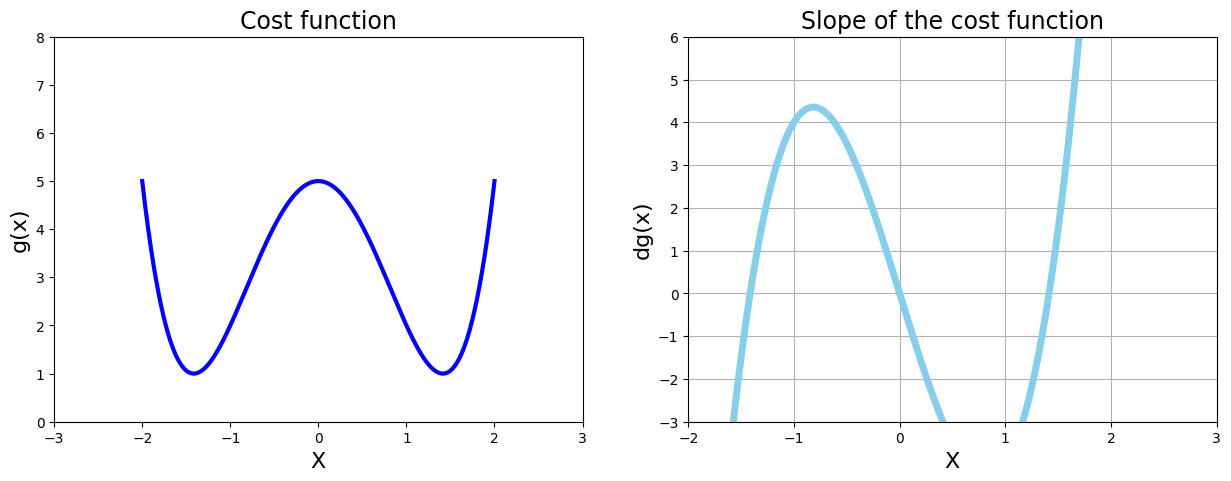

In [60]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

In [72]:
# Gradient Descent
new_x_1 = 3
previous_x_1 = 0
step_multiplier_1 = 0.1
precision_1 = 0.00001

x_list_1 = [new_x_1]
print(x_list_1)
slope_list_1 = [df(new_x_1)]
print(slope_list_1)

for n in range(500):
    previous_x_1 = new_x_1
    gradient_1 = dg(previous_x_1)  # [REQUIRED] Calculate the derivative/gradient at previous_x
    
    new_x_1 = previous_x_1 - step_multiplier_1 * gradient_1  # [REQUIRED] Update new_x using gradient descent formula

    step_size_1 = abs(new_x_1 - previous_x_1)
    # step_size = abs(new_x - previous_x): Computes the size of the step taken in this iteration.
    print(step_size_1)

    x_list_1.append(new_x_1)
    slope_list_1.append(dg(new_x_1))  # [REQUIRED] Append the derivative/gradient at new_x to slope_list

    if step_size_1 < precision_1:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', dg(new_x_1))
print('f(x) value or cost at this point is:', g(new_x_1))
print(x_list_1)


[3]
[7]
8.4
58.66560000000001
60407.96605222262
87941382249183.67
2.720444391704307e+41
8.05340518972501e+123


OverflowError: (34, 'Result too large')

[ 3.00000000e+000 -5.40000000e+000  5.32656000e+001 -6.03547005e+004
  8.79413822e+013 -2.72044439e+041  8.05340519e+123]


/var/folders/5q/05l5lt512wb211kc70mkqccw0000gn/T/ipykernel_55723/460651863.py:13: RuntimeWarning: overflow encountered in power
  return  x**4 - 4*(x**2) + 5


ValueError: x and y must be the same size

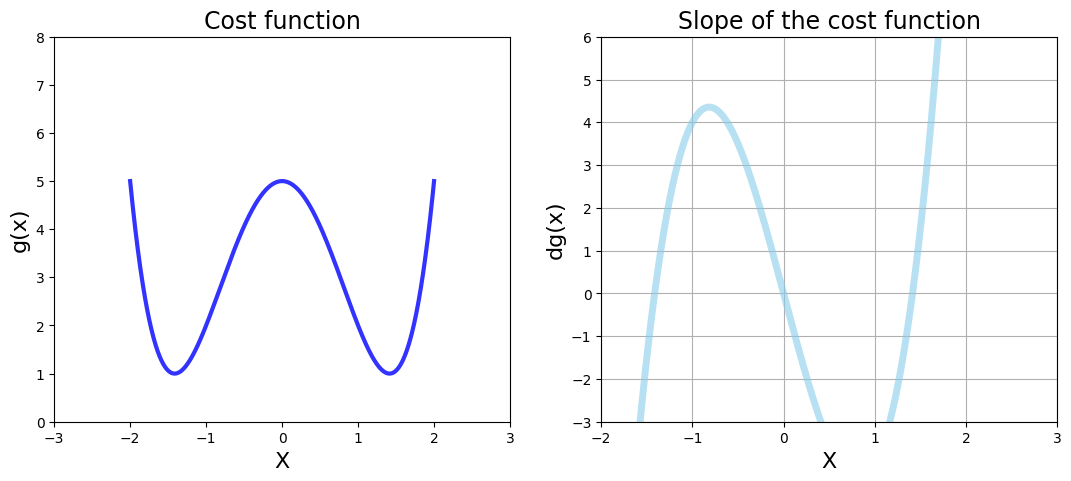

In [71]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list_1)
print(values)
plt.scatter(x_list_1, g(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list_1, slope_list_1, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list_1, slope_list_1, color='red', s=300, alpha=0.6)


plt.show()

## Gradient Descent

In [73]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [74]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [75]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [76]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


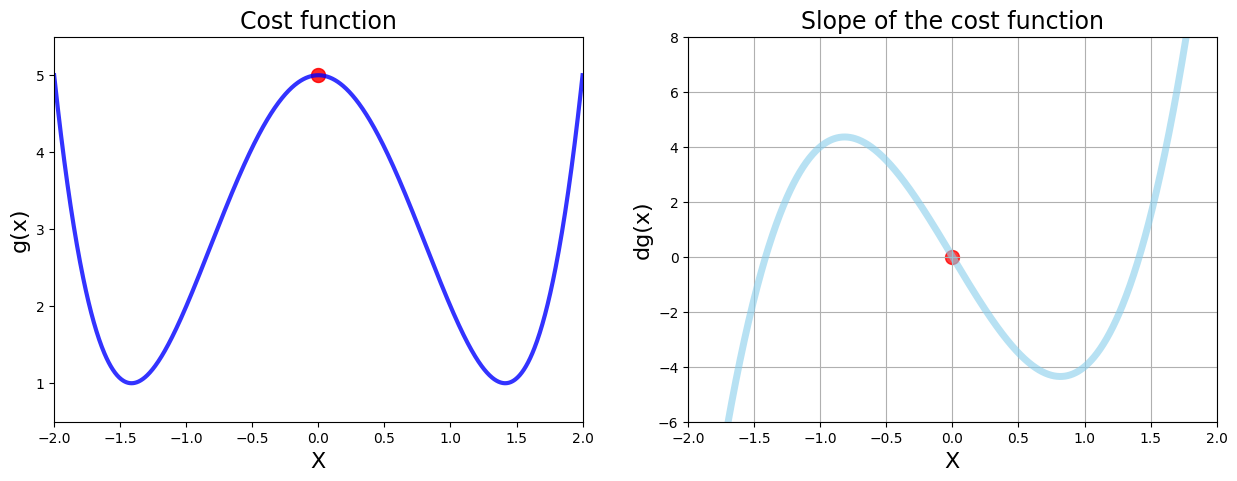

In [77]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

In [81]:
## TASK-4 : Code the same things as they were done for the first two examples

x_3 = np.linspace(-2, 2, 1000)

def h(x):
    return  x**5 - 2*(x**4) + 2

def dh(x):
    return 5*(x**4) - 8*(x**3)

print(x_3)

[-2.         -1.995996   -1.99199199 -1.98798799 -1.98398398 -1.97997998
 -1.97597598 -1.97197197 -1.96796797 -1.96396396 -1.95995996 -1.95595596
 -1.95195195 -1.94794795 -1.94394394 -1.93993994 -1.93593594 -1.93193193
 -1.92792793 -1.92392392 -1.91991992 -1.91591592 -1.91191191 -1.90790791
 -1.9039039  -1.8998999  -1.8958959  -1.89189189 -1.88788789 -1.88388388
 -1.87987988 -1.87587588 -1.87187187 -1.86786787 -1.86386386 -1.85985986
 -1.85585586 -1.85185185 -1.84784785 -1.84384384 -1.83983984 -1.83583584
 -1.83183183 -1.82782783 -1.82382382 -1.81981982 -1.81581582 -1.81181181
 -1.80780781 -1.8038038  -1.7997998  -1.7957958  -1.79179179 -1.78778779
 -1.78378378 -1.77977978 -1.77577578 -1.77177177 -1.76776777 -1.76376376
 -1.75975976 -1.75575576 -1.75175175 -1.74774775 -1.74374374 -1.73973974
 -1.73573574 -1.73173173 -1.72772773 -1.72372372 -1.71971972 -1.71571572
 -1.71171171 -1.70770771 -1.7037037  -1.6996997  -1.6956957  -1.69169169
 -1.68768769 -1.68368368 -1.67967968 -1.67567568 -1

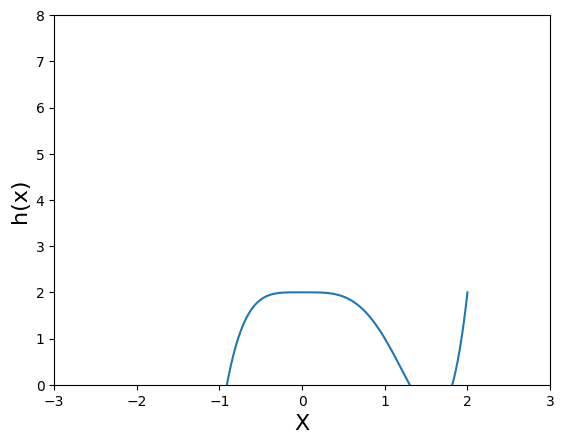

In [82]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3))
plt.show()

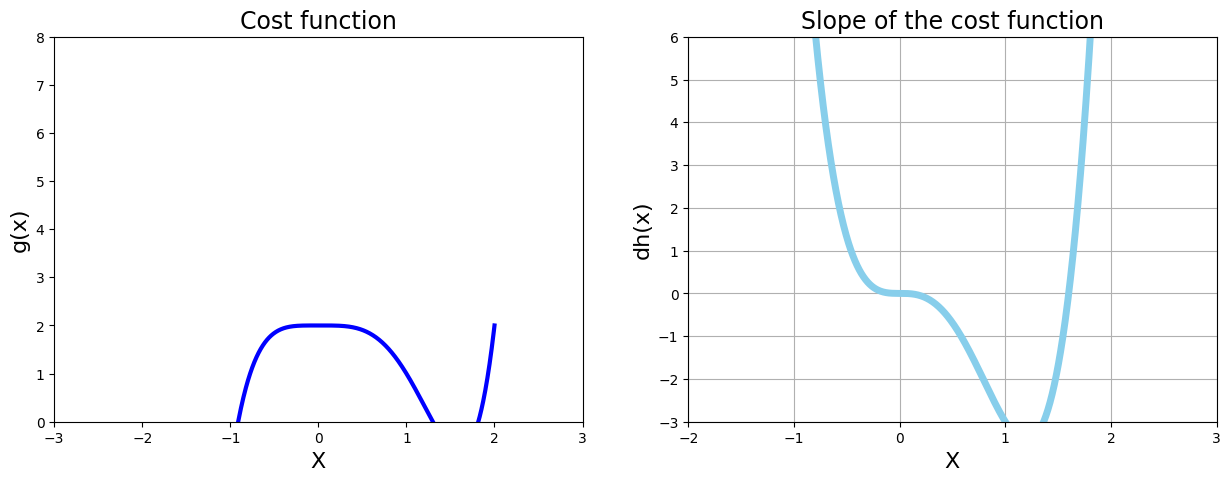

In [83]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5)

plt.show()

In [85]:
# Gradient Descent
new_x_2 = 3
previous_x_2 = 0
step_multiplier_2 = 0.1
precision_2 = 0.00001

x_list_2 = [new_x_2]
print(x_list_2)
slope_list_2 = [df(new_x_2)]
print(slope_list_1)

for n in range(500):
    previous_x_1 = new_x_2
    gradient_2 = dh(previous_x_2)  # [REQUIRED] Calculate the derivative/gradient at previous_x
    
    new_x_2 = previous_x_2 - step_multiplier_2 * gradient_2 # [REQUIRED] Update new_x using gradient descent formula

    step_size_2 = abs(new_x_2 - previous_x_2)
    # step_size = abs(new_x - previous_x): Computes the size of the step taken in this iteration.
    print(step_size_2)

    x_list_2.append(new_x_2)
    slope_list_2.append(dh(new_x_2))  # [REQUIRED] Append the derivative/gradient at new_x to slope_list

    if step_size_2 < precision_2:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', dh(new_x_2))
print('f(x) value or cost at this point is:', h(new_x_2))
print(x_list_1)


[3]
[7]
0.0
Loop ran this many times: 0
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 0.0
f(x) value or cost at this point is: 2.0
[3, -5.4, 53.26560000000001, -60354.70045222262, 87941382188828.97, -2.720444391704307e+41, 8.05340518972501e+123]


[3. 0.]


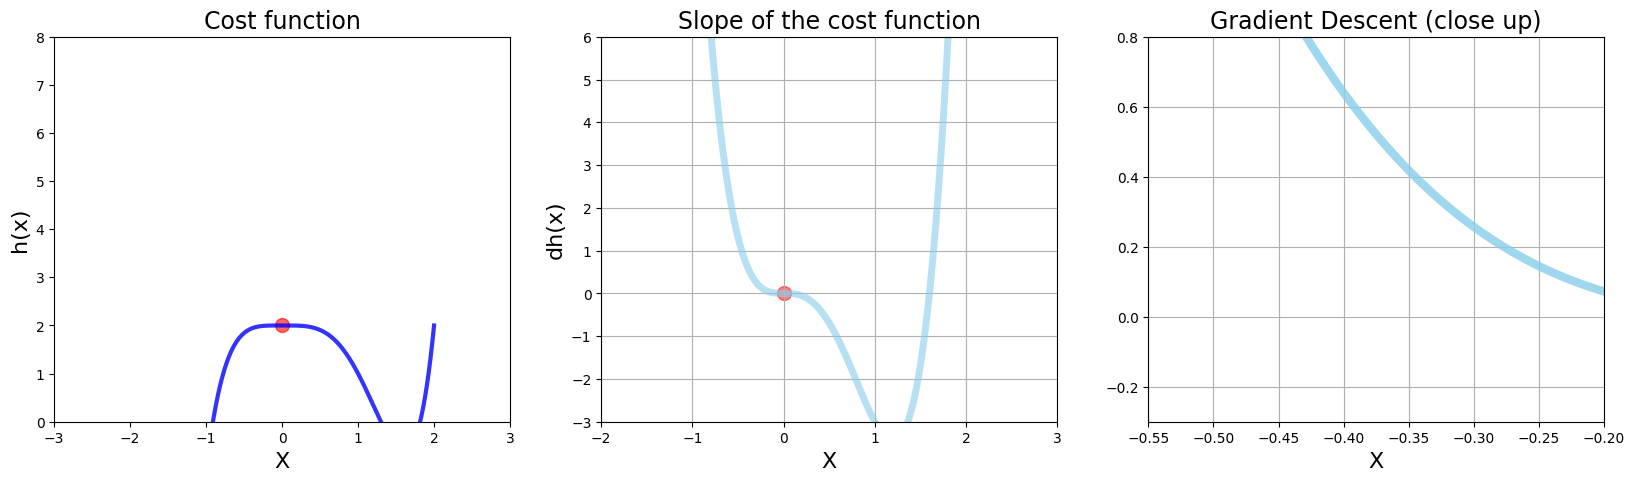

In [86]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)

values_1 = np.array(x_list_2)
print(values_1)
plt.scatter(x_list_2, h(values_1), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list_2, slope_list_2, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list_2, slope_list_2, color='red', s=300, alpha=0.6)


plt.show()

# The Learning Rate

In [96]:
x_2 = np.linspace(-2, 2, 1000)
def g(x):
    return  x**5 - 2*(x**4) + 2

def dg(x):
    return 5*(x**4) - 8*(x**3)

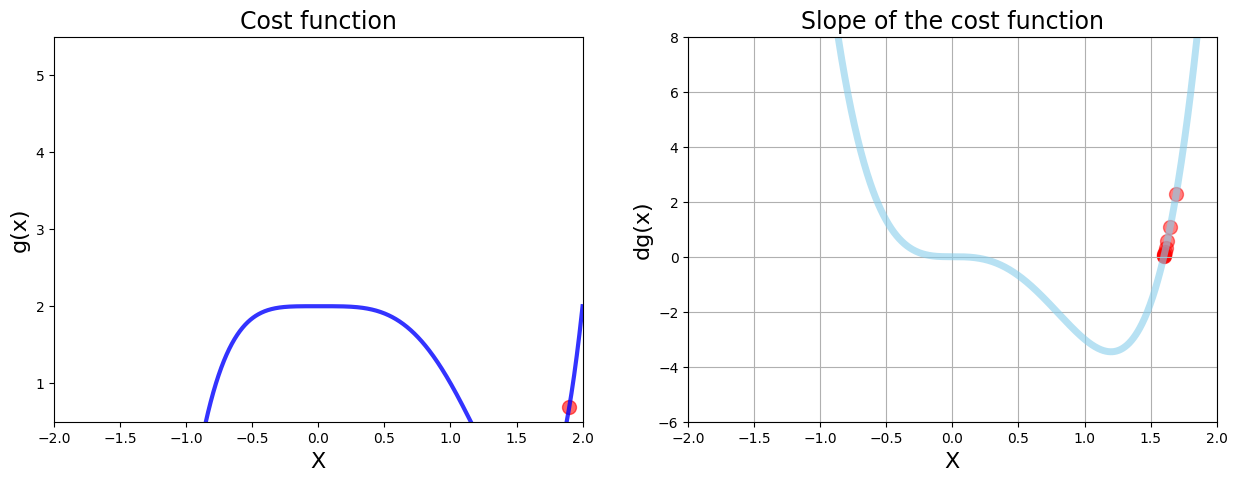

Number of steps is:  10


In [97]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

In [98]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
# insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
#                                                 multiplier=0.25, precision=0.0001, max_iter=n)

In [99]:
new_x_low, x_list_low, slop_list_low = low_gamma
new_x_mid, x_list_mid, slop_list_mid = mid_gamma
new_x_high, x_list_high, slop_list_high = high_gamma

For low gamma


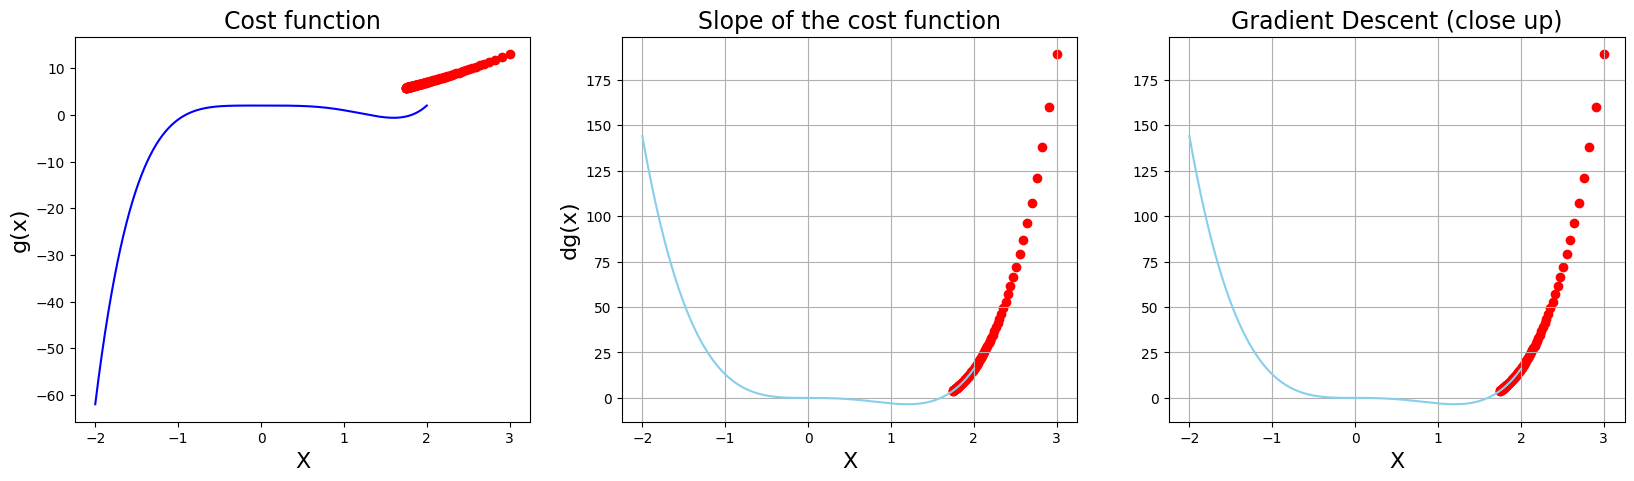

For mid gamma


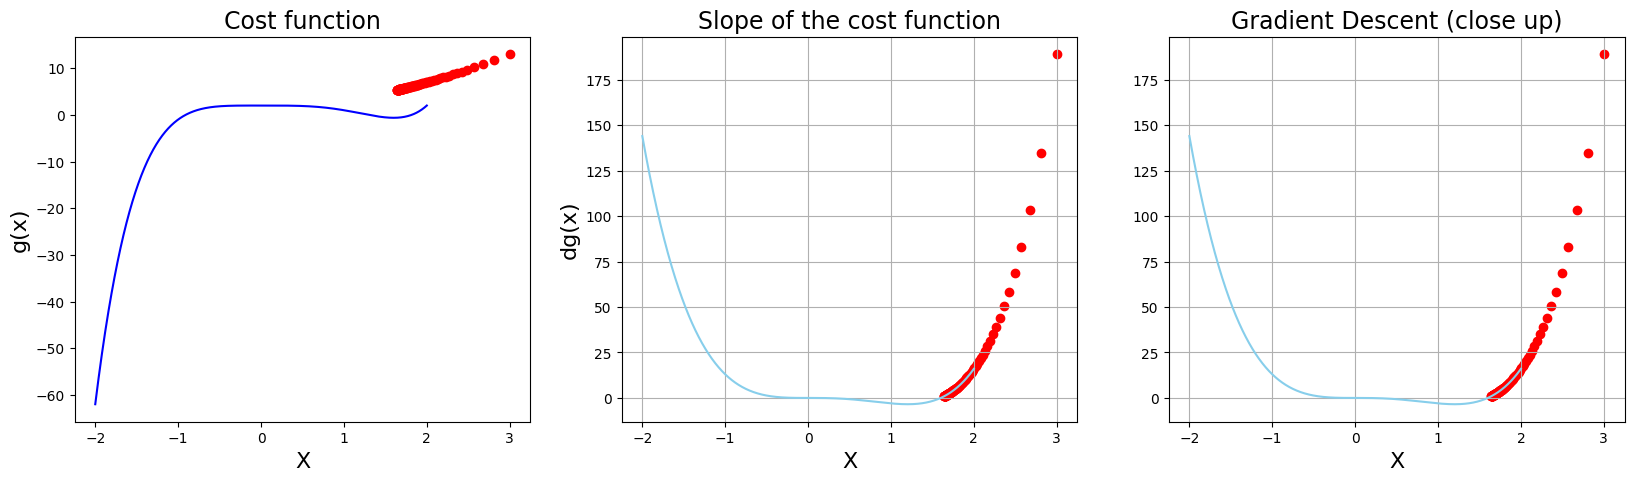

For high gamma


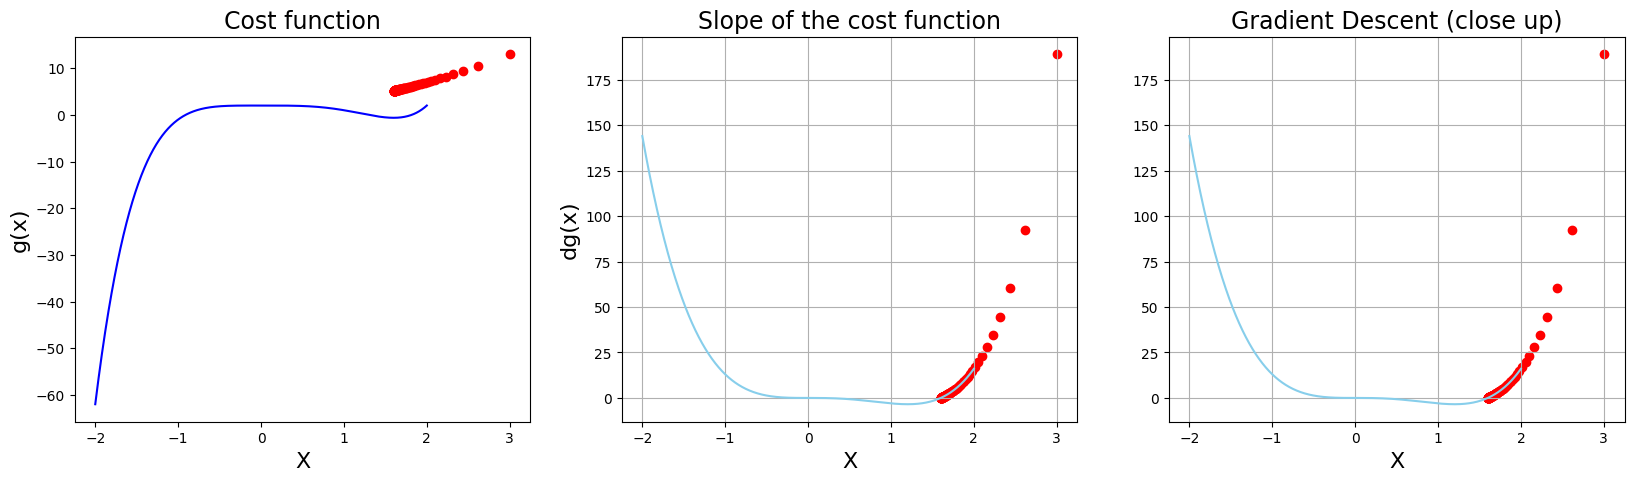

In [100]:
## TASK-7 : Plot reduction in cost for each iteration



print("For low gamma")
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

# plt.xlim(-3, 3)
# plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue')

values = np.array(x_list_low)
plt.scatter(x_list_low, f(values), color='red')

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
# plt.xlim(-2, 3)
# plt.ylim(-3, 6)

plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(x_list_low, slop_list_low, color='red')

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
# plt.xlim(-0.55, -0.2)
# plt.ylim(-0.3, 0.8)

plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(x_list_low, slop_list_low, color='red')


plt.show()

print("For mid gamma")
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

# plt.xlim(-3, 3)
# plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue')

values = np.array(x_list_mid)
plt.scatter(x_list_mid, f(values), color='red')

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
# plt.xlim(-2, 3)
# plt.ylim(-3, 6)

plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(x_list_mid, slop_list_mid, color='red')

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
# plt.xlim(-0.55, -0.2)
# plt.ylim(-0.3, 0.8)

plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(x_list_mid, slop_list_mid, color='red')


plt.show()


print("For high gamma")
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

# plt.xlim(-3, 3)
# plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue')

values = np.array(x_list_high)
plt.scatter(x_list_high, f(values), color='red')

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
# plt.xlim(-2, 3)
# plt.ylim(-3, 6)

plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(x_list_high, slop_list_high, color='red')

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
# plt.xlim(-0.55, -0.2)
# plt.ylim(-0.3, 0.8)

plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(x_list_high, slop_list_high, color='red')



# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [101]:
## TASK-8 : Code the same things as they were done for the first two examples

def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r + 1)


In [102]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


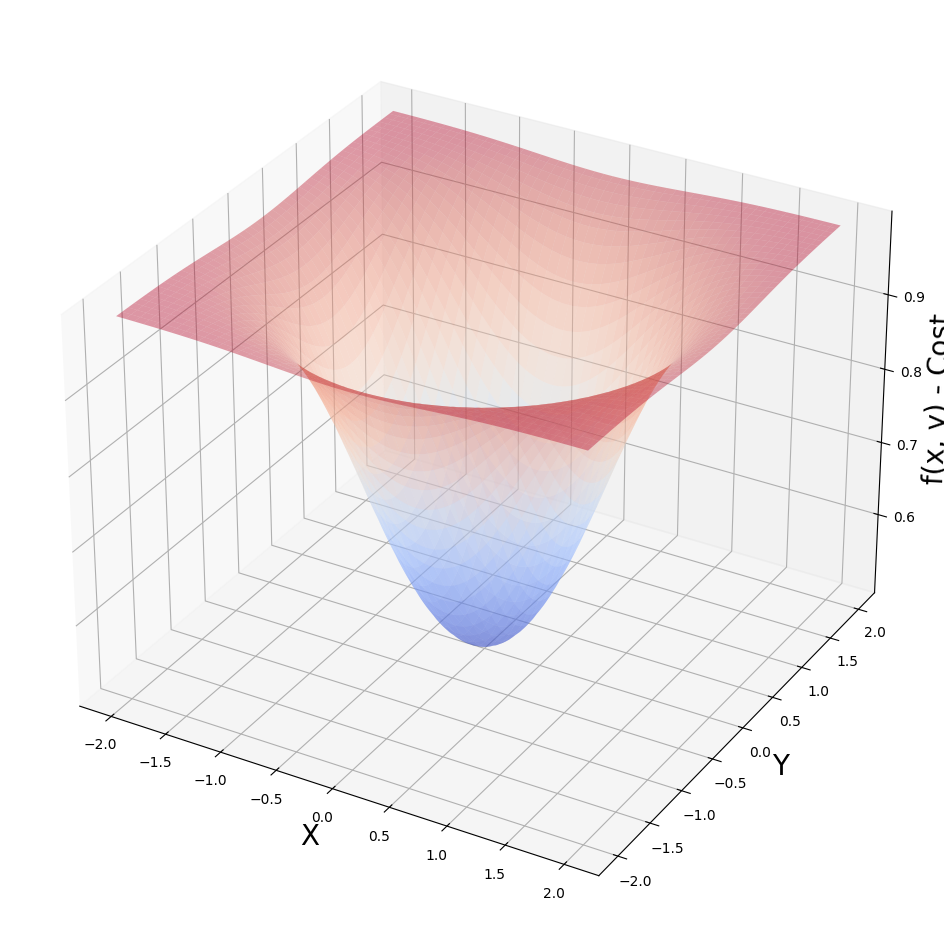

In [103]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

##########################
##########################

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = ## [REQUIRED]

## $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [104]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [105]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [106]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return (log(3)*(-2*x)*(3**(-x**2-y**2)))/(3**(-x**2-y**2) + 1)**2

def fpy(x, y):
    return (log(3)*(-2*y)*(3**(-x**2-y**2)))/(3**(-x**2-y**2) + 1)**2


In [107]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-0.00326383 -0.00181324]
Minimum occurs at x value of:  2.2575090774608113
Minimum occurs at y value of:  1.254171709700453
The cost is:  0.9993428679673646


## Graphing 3D Gradient Descent

In [108]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [-0.00763824 -0.00424346]
Minimum occurs at x value of:  2.1115555378939073
Minimum occurs at y value of:  1.1730864099410614
The cost is:  0.9983579744789036


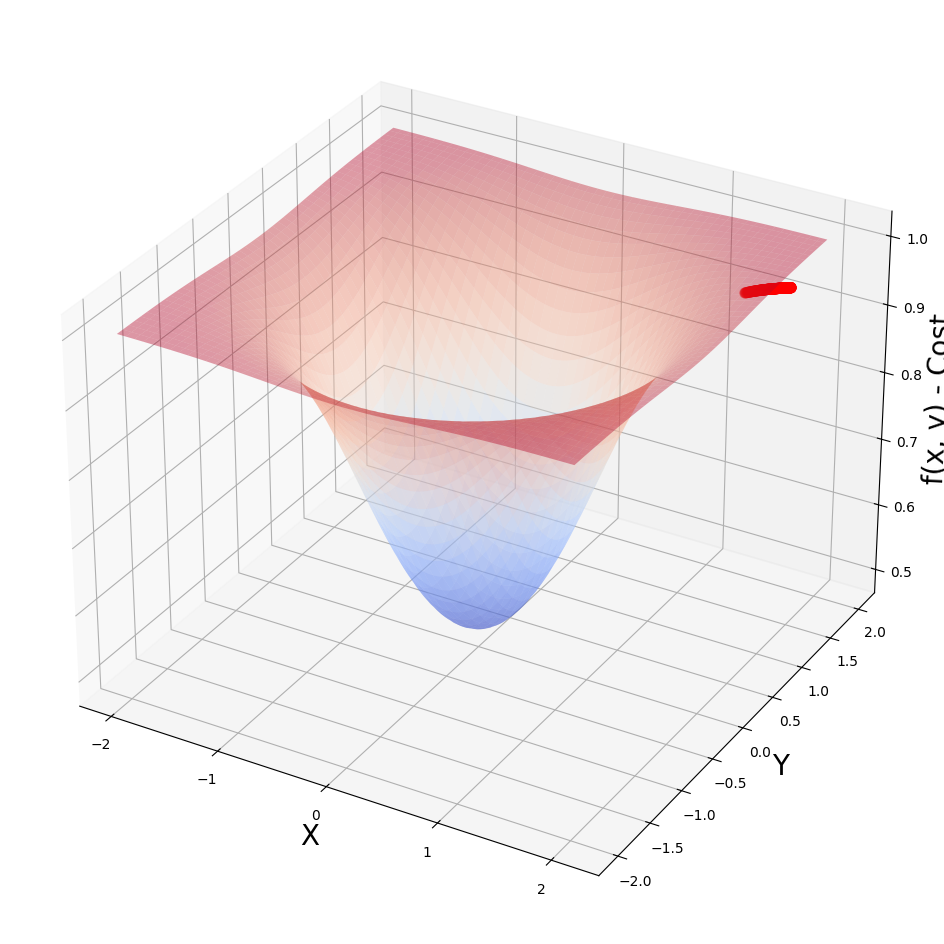

In [109]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [110]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [111]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


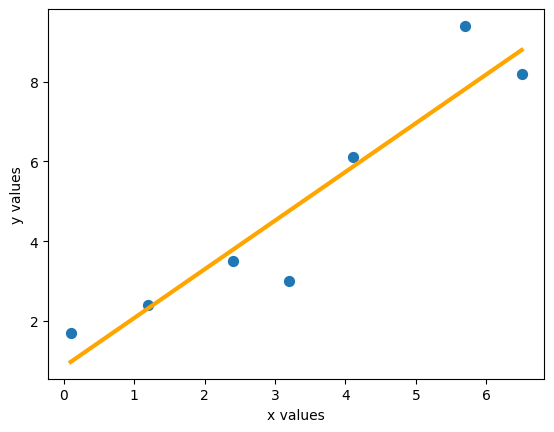

In [112]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [113]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [115]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [116]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [117]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [118]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


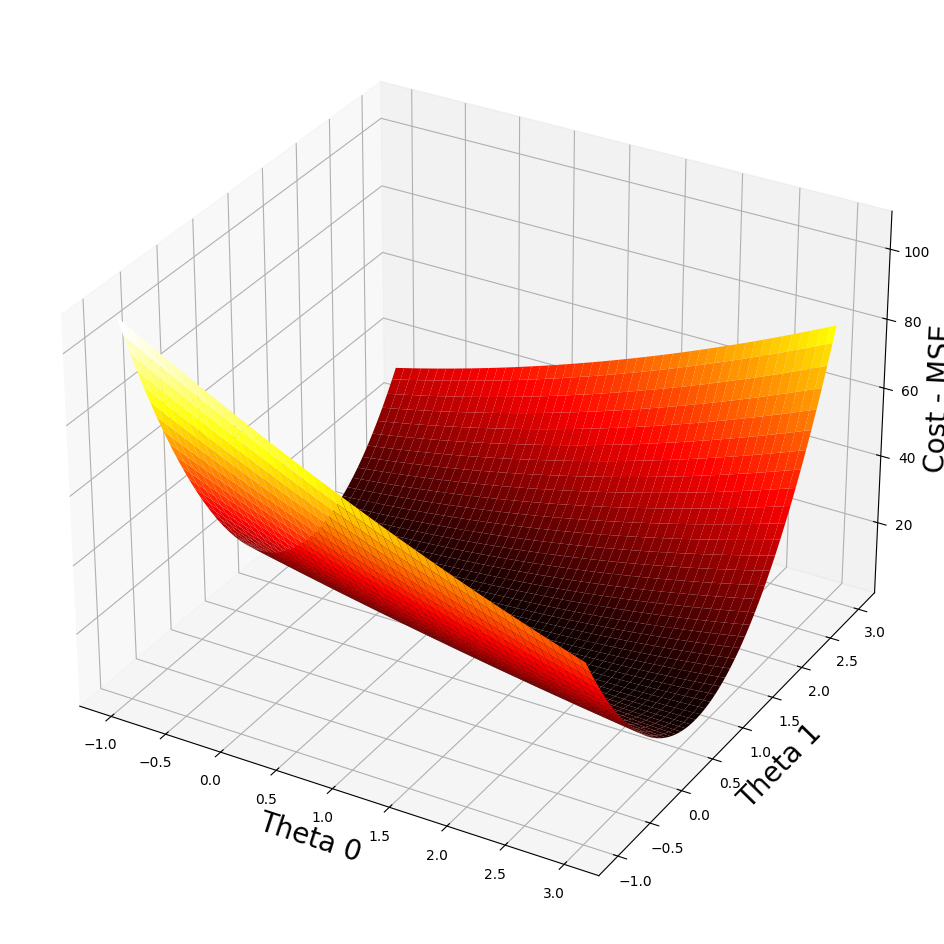

In [119]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [120]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [121]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [122]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


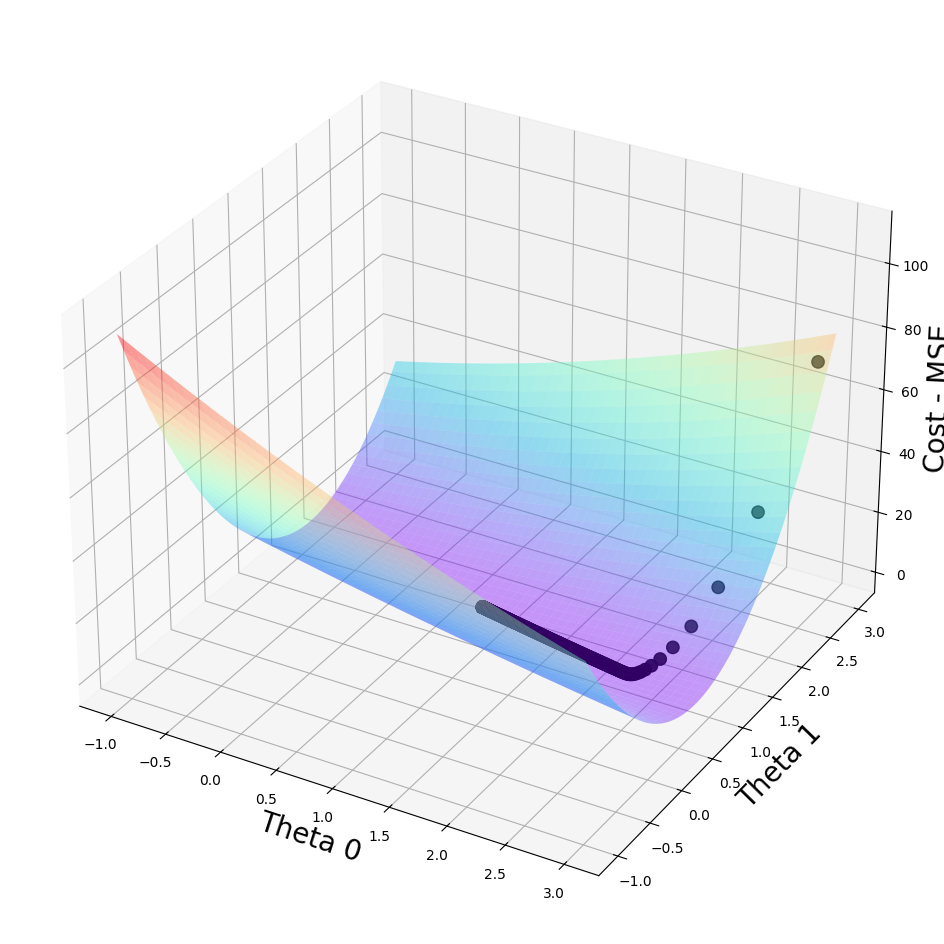

In [123]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()